In [5]:
import os

if "main.py" not in os.listdir():
    os.chdir("../../src")

os.listdir()

['main.py', 'database', 'utils', 'screening', '__init__.py', 'notebooks']

In [6]:
from utils.paths import CHEMBL_34_SDF_PATH

In [7]:
from rdkit import Chem

In [16]:
suppl = Chem.SDMolSupplier(CHEMBL_34_SDF_PATH)

In [17]:
len(suppl)

2409270

In [ ]:
for mol in suppl:
    if mol is None:
        print("Mol is None")
    else:
        mol.GetNumAtoms()

[19:23:54] Both bonds on one end of an atropisomer are on the same side - atoms is : 6
[19:23:59] Explicit valence for atom # 0 P, 7, is greater than permitted
[19:23:59] ERROR: Could not sanitize molecule ending on line 2986099
[19:23:59] ERROR: Explicit valence for atom # 0 P, 7, is greater than permitted


Mol is None


[19:24:03] Explicit valence for atom # 1 P, 7, is greater than permitted
[19:24:03] ERROR: Could not sanitize molecule ending on line 3747881
[19:24:03] ERROR: Explicit valence for atom # 1 P, 7, is greater than permitted


Mol is None


[19:24:03] Explicit valence for atom # 1 P, 7, is greater than permitted
[19:24:03] ERROR: Could not sanitize molecule ending on line 3913285
[19:24:03] ERROR: Explicit valence for atom # 1 P, 7, is greater than permitted


Mol is None


[19:24:06] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 10 ignored.
[19:24:06] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 10 ignored.
[19:24:27] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 48 ignored
[19:24:27] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 48 ignored
[19:24:57] Both bonds on one end of an atropisomer are on the same side - atoms is : 7
[19:24:59] Both bonds on one end of an atropisomer are on the same side - atoms is : 3
[19:25:39] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 0 ignored.
[19:25:39] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 0 ignored.


In [18]:
for i, mol in zip(range(5), suppl):
    print(mol.GetProp("chembl_id"))
    print(Chem.MolToSmiles(mol))
    print(mol.GetNumAtoms())

CHEMBL153534
Cc1cc(-c2csc(N=C(N)N)n2)cn1C
16
CHEMBL440060
CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@@H](N)CCSC)[C@@H](C)O)C(=O)NCC(=O)N[C@@H](C)C(=O)N[C@@H](C)C(=O)N[C@@H](Cc1c[nH]cn1)C(=O)N[C@@H](CC(N)=O)C(=O)NCC(=O)N[C@@H](C)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCN=C(N)N)C(=O)NCC(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)NCC(=O)N1CCC[C@H]1C(=O)N1CCC[C@H]1C(=O)NCC(=O)N[C@@H](CO)C(=O)N[C@@H](CCCN=C(N)N)C(N)=O
202
CHEMBL440245
CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](Cc2c[nH]cn2)NC(=O)[C@H](N)Cc2ccccc2)C(C)C)CCC(=O)NCCCC[C@@H](C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](C)C(=O)N[C@@H](Cc2c[nH]cn2)C(=O)N[C@@H](CO)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](CCCCN)

In [7]:
import os

os.listdir()

['dev-initial-screening.ipynb']

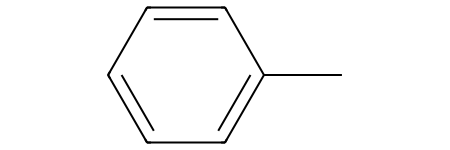

In [4]:
m = Chem.MolFromSmiles("Cc1ccccc1")
m

### Lipinski

In [ ]:
from rdkit.Chem import Descriptors

MW = Descriptors.MolWt(mol)
HBA = Descriptors.NOCount(mol)
HBD = Descriptors.NHOHCount(mol)
LogP = Descriptors.MolLogP(mol)
conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
pass_ro5 = conditions.count(True) >= 3
print(pass_ro5)